In [39]:
import ROOT

In [40]:
c1 = ROOT.TCanvas()

In [41]:
ROOT.TMVA.Tools.Instance()
ROOT.TMVA.PyMethodBase.PyInitialize()
reader = ROOT.TMVA.Reader("Color:!Silent")

In [42]:
outputfile = ROOT.TFile.Open("flixnet.root","RECREATE")
factory = ROOT.TMVA.Factory("Flixnet_Classification", outputfile,"!V:ROC:!Silent:Color:AnalysisType=Classification" )

In [43]:
header_row = open('../my_python_examples/liked.csv').readline().strip().split(',')

In [44]:
header_row

['comed', 'drama', 'epifa', 'eroti', 'myste', 'roman', 'thril']

In [45]:
branch_names = ':'.join([feature+'/I' for feature in header_row])

In [46]:
branch_names

'comed/I:drama/I:epifa/I:eroti/I:myste/I:roman/I:thril/I'

In [47]:
sig_tree = ROOT.TTree("sig_tree", "sig_tree")

In [48]:
file_lines = open('../my_python_examples/liked.csv').readlines()

In [49]:
data_stream = ''.join([line for line in file_lines[1:]])

In [50]:
sig_tree.ReadStream(ROOT.istringstream(data_stream),branch_names,delimiter=',')

432

In [51]:
sig_tree.Print()

******************************************************************************
*Tree    :sig_tree  : sig_tree                                               *
*Entries :      432 : Total =           16952 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :comed     : comed/I                                                *
*Entries :      432 : Total  Size=       2381 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :drama     : drama/I                                                *
*Entries :      432 : Total  Size=       2381 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [52]:
c1.cd()

In [53]:
sig_tree.Draw("thril","","e")

432

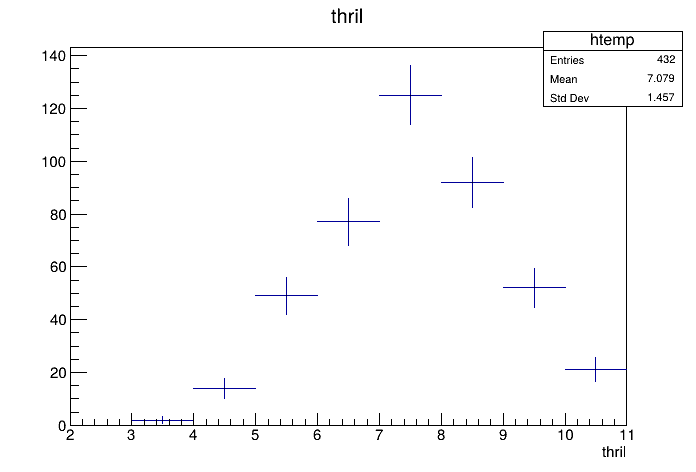

In [54]:
c1.Draw()

In [55]:
bkg_tree = ROOT.TTree("bkg_tree", "feat_tree")

In [56]:
file_lines2 = open('../my_python_examples/hated.csv').readlines()

In [57]:
data_stream2 = ''.join([line for line in file_lines2[1:]])

In [58]:
bkg_tree.ReadStream(ROOT.istringstream(data_stream2),branch_names,delimiter=',')

389

In [59]:
h3 = ROOT.TH1F("h3","feature value",10,1,11)

In [60]:
sig_tree.Draw("thril >> h3")

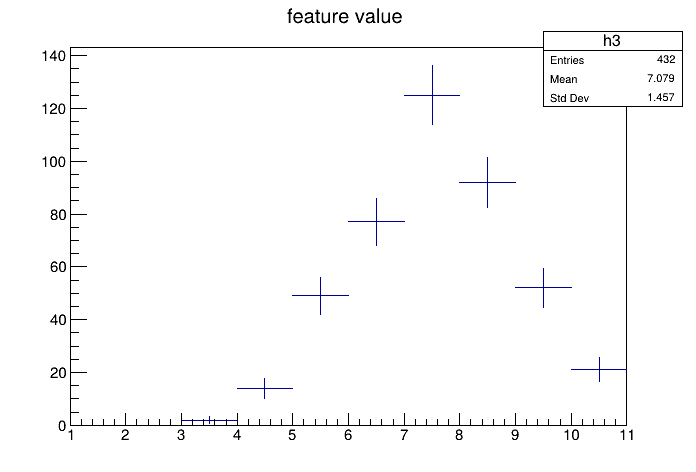

In [61]:
h3.Draw("e")
c1.Draw()

In [62]:
h4 = h3.Clone(); h4.SetName("h4")

In [63]:
bkg_tree.Draw("thril >> h4")

In [64]:
print(h4.GetEntries()); h4.SetLineColor(ROOT.kRed)

389.0


In [65]:
c1.cd(); h3.Draw("e"); h4.Draw("same")

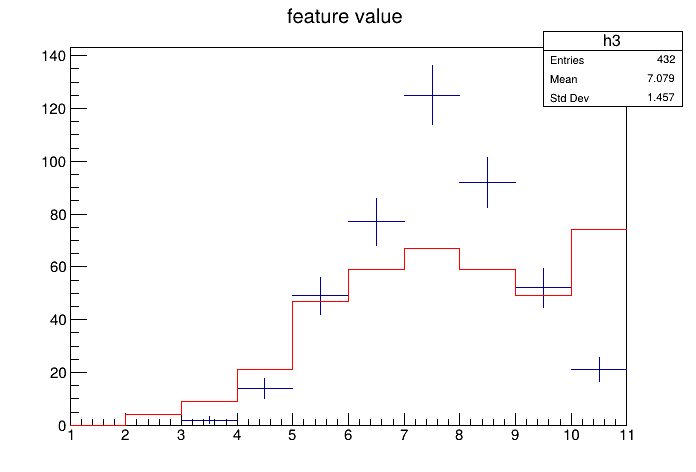

In [66]:
c1.Draw()

In [67]:
tdl = ROOT.TMVA.DataLoader("dataset")

In [68]:
for branch in sig_tree.GetListOfBranches():
    tdl.AddVariable(branch.GetName(),type='I')

In [69]:
tdl.AddSignalTree(sig_tree)
tdl.AddBackgroundTree(bkg_tree)

DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree sig_tree of type Signal with 432 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree bkg_tree of type Background with 389 events


In [70]:
factory.BookMethod( tdl, ROOT.TMVA.Types.kLikelihood, "Likelihood","!H:!V:TransformOutput:PDFInterpol=Spline3:NSmoothSig[0]=20:NSmoothBkg[0]=20:NSmooth=5:NAvEvtPerBin=50:VarTransform=None") 
factory.BookMethod( tdl, ROOT.TMVA.Types.kMLP, "MLP", "H:!V:NeuronType=tanh:VarTransform=N:NCycles=1000:HiddenLayers=N+5:TestRate=5:!UseRegulator")
factory.BookMethod( tdl, ROOT.TMVA.Types.kFisher, "Fisher", "H:!V:Fisher:VarTransform=None:CreateMVAPdfs:PDFInterpolMVAPdf=Spline3:NbinsMVAPdf=30:NsmoothMVAPdf=10" )
                   

Factory                  : Booking method: Likelihood
                         : 
Factory                  : Booking method: MLP
                         : 
MLP                      : [dataset] : Create Transformation "N" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'comed' <---> Output : variable 'comed'
                         : Input : variable 'drama' <---> Output : variable 'drama'
                         : Input : variable 'epifa' <---> Output : variable 'epifa'
                         : Input : variable 'eroti' <---> Output : variable 'eroti'
                         : Input : variable 'myste' <---> Output : variable 'myste'
                         : Input : variable 'roman' <---> Output : variable 'roman'
                         : Input : variable 'thril' <---> Output : variable 'thril'
MLP                      : Building Network. 
                     

In [71]:
factory.TrainAllMethods()

Factory                  : Train all methods
                         : Rebuilding Dataset dataset
                         : Building event vectors for type 2 Signal
                         : Dataset[dataset] :  create input formulas for tree sig_tree
                         : Building event vectors for type 2 Background
                         : Dataset[dataset] :  create input formulas for tree bkg_tree
DataSetFactory           : [dataset] : Number of events in input trees
                         : 
                         : 
                         : Dataset[dataset] : Weight renormalisation mode: "EqualNumEvents": renormalises all event classes ...
                         : Dataset[dataset] :  such that the effective (weighted) number of events in each class is the same 
                         : Dataset[dataset] :  (and equals the number of events (entries) given for class=0 )
                         : Dataset[dataset] : ... i.e. such that Sum[i=1..N_j]{w_i} = N_classA, 

0%, time left: unknown
7%, time left: 0 sec
12%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 1 sec
12%, time left: 1 sec
18%, time left: 1 sec
25%, time left: 1 sec
31%, time left: 1 sec
37%, time left: 1 sec
43%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
62%, time left: 0 sec
68%, time left: 0 sec
75%, time left: 0 sec
81%, time left: 0 sec
87%, time left: 0 sec
93%, time left: 0 sec
0%, time left: unknown
7%, time left: 0 sec
12%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

In [72]:
factory.TestAllMethods()

Factory                  : Test all methods
Factory                  : Test method: Likelihood for Classification performance
                         : 
Likelihood               : [dataset] : Evaluation of Likelihood on testing sample (410 events)
                         : Elapsed time for evaluation of 410 events: 0.000646 sec       
Factory                  : Test method: MLP for Classification performance
                         : 
MLP                      : [dataset] : Evaluation of MLP on testing sample (410 events)
                         : Elapsed time for evaluation of 410 events: 0.00101 sec       
Factory                  : Test method: Fisher for Classification performance
                         : 
Fisher                   : [dataset] : Evaluation of Fisher on testing sample (410 events)
                         : Elapsed time for evaluation of 410 events: 0.000139 sec       
                         : Dataset[dataset] : Evaluation of Fisher on testing sample


0%, time left: unknown
7%, time left: 0 sec
12%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
7%, time left: 0 sec
12%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
7%, time left: 0 sec
12%, time left: 0 sec
19%, time left: 0 sec
25%, time left: 0 sec
32%, time left: 0 sec
38%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
82%, time 

In [73]:
 factory.EvaluateAllMethods()

Factory                  : Evaluate all methods
Factory                  : Evaluate classifier: Likelihood
                         : 
Likelihood               : [dataset] : Loop over test events and fill histograms with classifier response...
                         : 
TFHandler_Likelihood     : Variable        Mean        RMS   [        Min        Max ]
                         : -----------------------------------------------------------
                         :    comed:     6.0049     2.2868   [     1.0000     10.000 ]
                         :    drama:     3.5488     1.6121   [     1.0000     10.000 ]
                         :    epifa:     6.0854     3.1289   [     1.0000     10.000 ]
                         :    eroti:     4.5317     2.8653   [     1.0000     10.000 ]
                         :    myste:     6.5829     2.6391   [     1.0000     10.000 ]
                         :    roman:     4.3780     3.0429   [     1.0000     10.000 ]
                         :    th

In [74]:
outputfile.Write()

348966

In [121]:
ROOT.TMVA.TMVAGui("flixnet.root")

--- Launch TMVA GUI to view input file: flixnet.root


In [43]:
f = ROOT.TFile("flixnet.root")